# Praca domowa 6
### Martyna Majchrzak
#### 02.06.2020

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import cluster, mixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
np.random.seed(1)

## Dane

In [120]:
data = pd.read_csv('..\\..\\clustering_R3.csv')
data.head()

,X1,X2,X3
0,152.077986,197.910402,1.095707
1,145.520487,202.128032,2.738826
2,155.441273,198.122696,0.640457
3,150.389105,206.808383,0.686486
4,149.863221,205.417527,3.555814


In [121]:
data.describe()

,X1,X2,X3
count,1000.000000,1000.000000,1000.000000
mean,240.181036,154.937365,5.454947
std,115.556334,41.964161,4.793973
min,38.516347,87.376621,0.125057
25%,148.801776,104.853322,1.806255
50%,231.754437,151.846118,3.430892
75%,350.277958,198.367658,8.287805
max,399.930758,213.917568,24.537806


## Standaryzacja zmiennych

In [122]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(dane.iloc[:,[0,1,2]])
data = pd.DataFrame(std_scale.transform(dane.iloc[:,[0,1,2]]), columns=["X1", "X2", "X3"])

data.head()

,X1,X2,X3
0,-0.762807,1.024554,-0.909772
1,-0.819582,1.125110,-0.566853
2,-0.733687,1.029615,-1.004782
3,-0.777429,1.236698,-0.995176
4,-0.781982,1.203537,-0.396348


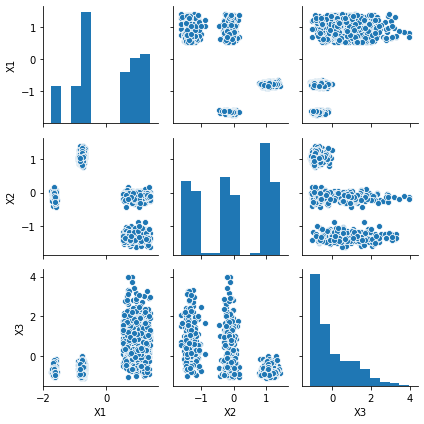

In [123]:
sns.pairplot(data, height=2)
plt.tight_layout()

## Metryki

Do porównania modeli posłużymy się trzema metrykami:
    
### 1. The Silhouette Coefficient 

Dla każdej obserwacji wyliczane są 2 wartości: 
    
        a: Średnia odległość od wszystkich punktów z tej samego klastra co obserwacja

        b: Średnia odległość obserwacji od wszystkich punktów z kolejnego najbliższego klastra.
        
    
Silhouette Coefficient dla pojedynczej obserwacji to (a-b)/max(a,b), a dla zbioru średnia z wyników wszystkich obserwacji.

#### Zakres wartości: 
    -1 (dla niepoprawnej klasteryzacji) 
    1 (dla bardzo gęstych klastrów)
    0 oznacza nakładające się klastry
    
  
### 2. Davies-Bouldin Index

Oznacza średnie 'podobieństwo' między klastrami, gdzie miara podobieństwa porównuje odległość między klastrami z ich wielkością.

#### Wartość: 
    im bliższa 0, tym podział lepszy

### 3. Calinski-Harabasz Index

    
Oznacza stosunek pomiędzy sumą kwadratów odległości pomiędzy klastrami oraz sumą kwadratów odległości wewnątrz klastrów.
    
#### Wartość: 
    im wyższa tym klastry gęstsze i lepiej oddzielone od siebie
     

Warto zauważyć, że według dokumentacji wszystkie powyższe metryki faworyzują wypukłe klastry ponad inne typy (np. oparte na gęstości, takie, jak zwraca DBSCAN i GMM).  

Źródła: 

1. https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient
2. https://scikit-learn.org/stable/modules/clustering.html#davies-bouldin-index
3. https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index

## DBSCAN - Density-Based Spatial Clustering of Applications with Noise.

Postaramy się na początku za pomocą wspomnianych 3 metryk wybrać najlepszą wartość parametru epsilon z przedziału <0.1,1>.

In [124]:
epsilons=np.arange(0.1, 1.1, 0.1)
dbscan_silhouette = [] 
dbscan_davies_bouldin=[]
dbscan_calinski_harabasz=[]
for epsilon in epsilons:
        dbscan_model = cluster.DBSCAN(eps=epsilon)
        dbscan_labels = dbscan_model.fit_predict(data)
        dbscan_silhouette.append(silhouette_score(data, dbscan_labels))
        dbscan_davies_bouldin.append(davies_bouldin_score(data, dbscan_labels))
        dbscan_calinski_harabasz.append(calinski_harabasz_score(data, dbscan_labels))


Text(0, 0.5, 'silhouette')

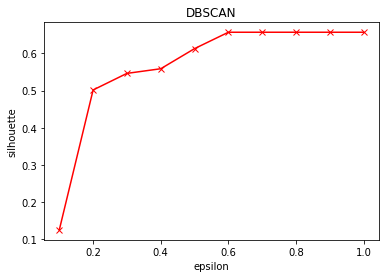

In [125]:
plt.plot(epsilons,dbscan_silhouette, 'rx-')
plt.title('DBSCAN')
plt.xlabel('epsilon')
plt.ylabel('silhouette')

Text(0, 0.5, 'davies_bouldin')

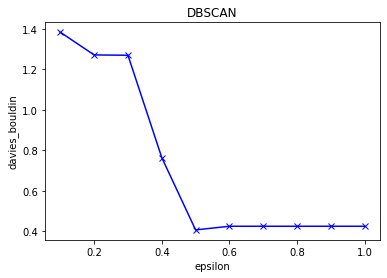

In [126]:
plt.plot(epsilons,dbscan_davies_bouldin, 'bx-')
plt.title('DBSCAN')
plt.xlabel('epsilon')
plt.ylabel('davies_bouldin')

Text(0, 0.5, 'calinski_harabasz')

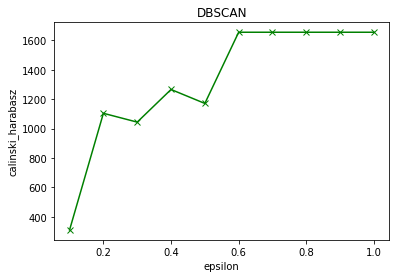

In [127]:
plt.plot(epsilons,dbscan_calinski_harabasz, '-gx')
plt.title('DBSCAN')
plt.xlabel('epsilon')
plt.ylabel('calinski_harabasz')

In [128]:
dbscan_scores= {'epsilon': epsilons,
        'silhouette':  dbscan_silhouette,
        'davies_bouldin':  dbscan_davies_bouldin,
        'calinski_harabasz':  dbscan_calinski_harabasz
        }
dbscan_scores_df = pd.DataFrame(dbscan_scores)
dbscan_scores_df

,epsilon,silhouette,davies_bouldin,calinski_harabasz
0,0.1,0.124721,1.383527,310.458768
1,0.2,0.501676,1.271303,1103.440960
2,0.3,0.546376,1.269832,1043.386624
3,0.4,0.558863,0.763729,1265.282180
4,0.5,0.613072,0.406175,1170.442088
5,0.6,0.657175,0.424246,1654.511257
6,0.7,0.657175,0.424246,1654.511257
7,0.8,0.657175,0.424246,1654.511257
8,0.9,0.657175,0.424246,1654.511257
9,1.0,0.657175,0.424246,1654.511257


Według metryk Silhouettte oraz Calinskiego-Harabasza najlepsze wyniki (dokładnie takie same) DSCAN osiąga dla epsilona z zakresu (0.6-1.0), a według metryki Daviesa-Bouldina dla 0.5.
Sprawdźmy jak wyglądają wyniki dla eps=0.5 oraz eps=0.6

#### DBCSAN Clustering, eps=0.5

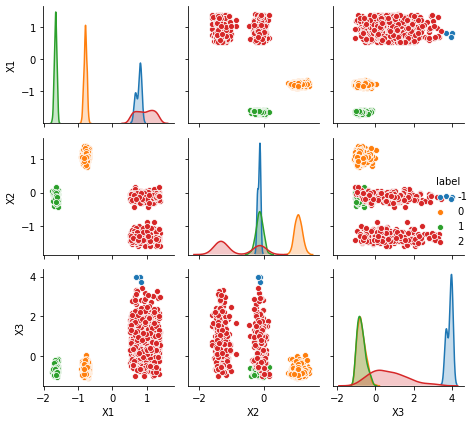

In [149]:
dbscan = cluster.DBSCAN(eps=0.5)
dbsan_label_05 = dbscan.fit_predict(data)
data['label'] = dbsan_label_05
sns.pairplot(data, height=2, hue='label')
plt.tight_layout()

In [150]:
data.drop('label', axis=1, inplace=True)

#### DBCSAN Clustering, eps=0.6

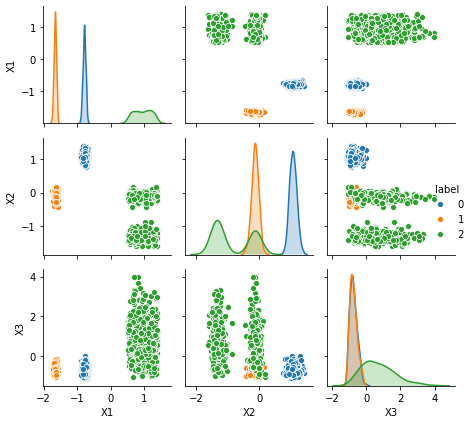

In [151]:
dbscan = cluster.DBSCAN(eps=0.6)
dbscan_label_06 = dbscan.fit_predict(data)
data['label'] = dbscan_label_06
sns.pairplot(data, height=2, hue='label')
plt.tight_layout()

In [132]:
data.drop('label', axis=1, inplace=True)

#### Werdykt

Zarówno dla eps=0.5 jak i eps=0.6 DBSCAN dzieli zbiór na 3 klastry. Dla eps=0.5 wykrywa on kilka 'noisy samples', czyli obserwacji niepasujących do żadnego klastra, oznaczanych numerem -1. DBSCAN dobiera automatycznie liczbę klastrów, która dla danego epsilona dawała najlepszy podział, więc możemy zakłożyć, że k=3 jest najlepszą wartością. Wizualnie podziały są do siebie bardzo podobne, ale drugi nie wykrywa 'noisy samples' i jest poparty 2 z 3 metryk, a więc przyjmiemy za optymalne eps=0.6.

## GMM - Gausian Mixture Models

Postaramy się przy pomocy wspomnianych metryk dobrać optymalną liczbę klastrów z przedziału <2,20>.

In [133]:
cluster_num_iter=np.arange(2, 21, 1)
gmm_silhouette = [] 
gmm_davies_bouldin=[]
gmm_calinski_harabasz=[]

for k in cluster_num_iter:
        gmm_model = mixture.GaussianMixture(n_components=k, covariance_type='full')
        gmm_labels = gmm_model.fit_predict(data)
        gmm_silhouette.append(silhouette_score(data, gmm_labels))
        gmm_davies_bouldin.append(davies_bouldin_score(data, gmm_labels))
        gmm_calinski_harabasz.append(calinski_harabasz_score(data, gmm_labels))

        

Text(0, 0.5, 'silhouette')

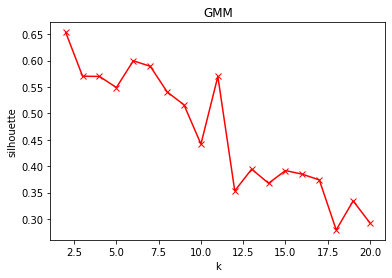

In [134]:
plt.plot(cluster_num_iter,gmm_silhouette, 'rx-')
plt.title('GMM')
plt.xlabel('k')
plt.ylabel('silhouette')

Text(0, 0.5, 'davies_bouldin')

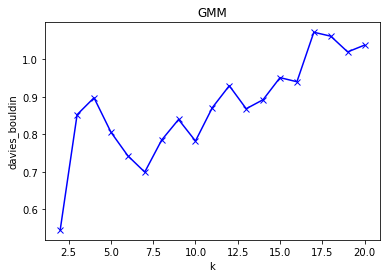

In [135]:
plt.plot(cluster_num_iter,gmm_davies_bouldin, 'bx-')
plt.title('GMM')
plt.xlabel('k')
plt.ylabel('davies_bouldin')

Text(0, 0.5, 'calinski_harabasz')

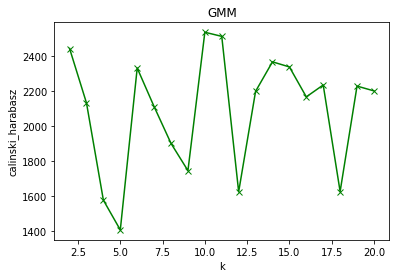

In [136]:
plt.plot(cluster_num_iter,gmm_calinski_harabasz, '-gx')
plt.title('GMM')
plt.xlabel('k')
plt.ylabel('calinski_harabasz')

Metryki Silhouette oraz Daviesa-Bouldina sugerują wybór k=2, a Calinskigo-Harabasza 10 lub 11 (dla 2 wynik jest kolejny co do wysokości). Sprawdźmy jak wygląda podział na klastry dla k=2 i k=10.

#### GMM clustering, k=2

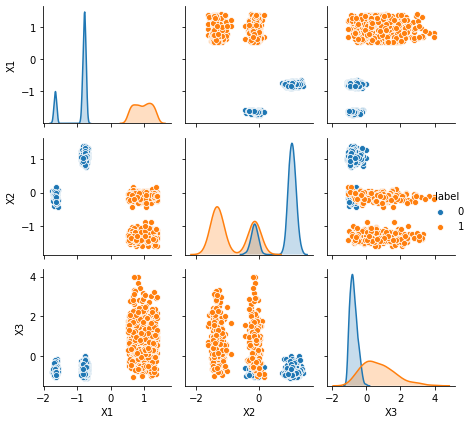

In [139]:
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full')
gmm_label_k2 = gmm.fit_predict(data)
data['label'] = gmm_label_k2
sns.pairplot(data, height=2, hue='label')
plt.tight_layout()

In [140]:
data.drop('label', axis=1, inplace=True)

#### GMM clustering, k=10

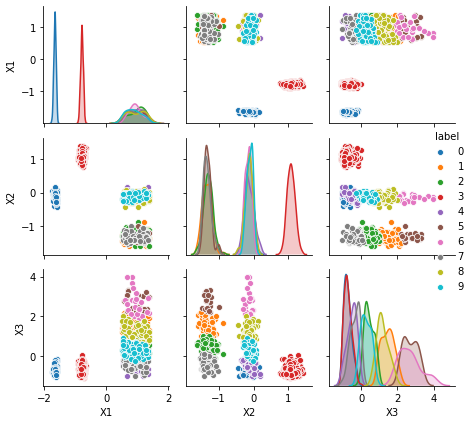

In [146]:
gmm = mixture.GaussianMixture(n_components=10, covariance_type='full')
gmm_label_k10 = gmm.fit_predict(data)
data['label'] = gmm_label_k10
sns.pairplot(data, height=2, hue='label')
plt.tight_layout()

In [147]:
data.drop('label', axis=1, inplace=True)

#### Werdykt

Podział na 2 klastry daje bardziej instuicyjny i przejrzysty podział i jest poparty wynikami 2 z 3 metryk, zatem przyjmiemy, że jest on przy GMM bardziej optymalny, niż podział na 10 klastrów.

## Porównanie wyników modeli

Porównamy wyniki DBSCAN oraz GMM posługując się wspomnianymi 3 metrykami.

In [144]:
scores = pd.DataFrame()
scores.loc["DBSCAN", "Silhouette"] = silhouette_score(data, dbscan_label_06)
scores.loc["DBSCAN", "Davies-Bouldin"] = davies_bouldin_score(data,dbscan_label_06)
scores.loc["DBSCAN", "Calinski-Harabasz"] = calinski_harabasz_score(data, dbscan_label_06)
scores.loc["GMM", "Silhouette"] = silhouette_score(data, gmm_label_k2)
scores.loc["GMM", "Davies-Bouldin"] = davies_bouldin_score(data,gmm_label_k2)
scores.loc["GMM", "Calinski-Harabasz"] = calinski_harabasz_score(data, gmm_label_k2)

scores

,Silhouette,Davies-Bouldin,Calinski-Harabasz
DBSCAN,0.657175,0.424246,1654.511257
GMM,0.653770,0.545305,2442.315877


Według Silhouette wyniki modeli są bardzo podobne - jednak dla DBSCAN nieznacznie wyższa.
Według Davies-Bouldin Index również DBSCAN osiągnął lepszy wynik (bo wartość jest bliższa 0).
Z kolei GMM uzyskał o połowę wyższy wynik według Calinski-Harabasz Index.

Jednak, gdy porównamy graficzne przedstawienia przypisania do klastrów wyraźnie widać, że GMM ze względu na zastosowanie tylko 2 klastrów "zbija" w jeden klaster obserwacje, które wyraźnie powinny zostać rozdzielone na 2, co poprawnie wykonuje DBSCAN. Sugeruje to, w połączeniu z wynikami metryk, że to on lepiej sobie poradził w przypadku tego zbioru.

## Oświadczenie
Oświadczam, że niniejsza praca stanowiąca podstawę do uznania osiągnięcia efektów uczenia się z przedmiotu _Wstęp do Uczenia Maszynowego_ została wykonana przeze mnie samodzielnie.

Martyna Majchrzak
298826